In [2]:
!pip install numpy pandas scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:

df = pd.read_csv(r'C:\Users\lokes\Downloads\credit car fraud db\creditcard.csv')


# Display basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Assuming 'Class' is the target column (0 = legitimate, 1 = fraud)
X = df.drop(columns=['Class'])
y = df['Class']

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution
print(y_train.value_counts(), "\n", y_test.value_counts())


Class
0    227451
1       394
Name: count, dtype: int64 
 Class
0    56864
1       98
Name: count, dtype: int64


In [6]:
# Initialize and train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]  # Probability of fraud


In [7]:
# Define costs
cost_false_positive = 1  # Cost of wrongly flagging a legit transaction
cost_false_negative = 10  # Cost of missing a fraud case

# Define threshold dynamically
threshold = cost_false_positive / (cost_false_positive + cost_false_negative)

# Apply decision rule
y_custom_pred = (y_pred_proba > threshold).astype(int)


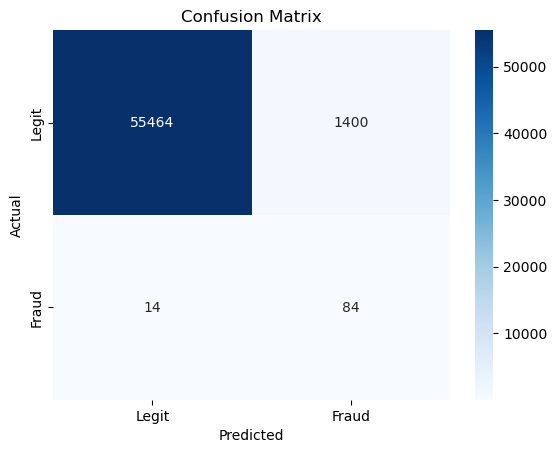

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.86      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUC-ROC Score: 0.963247971529636


In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_custom_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_custom_pred))

# AUC-ROC Score
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model again
nb_model.fit(X_train_resampled, y_train_resampled)


AttributeError: 'NoneType' object has no attribute 'split'

In [15]:
pip install scipy scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9764053228468101
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb_model, X_train, y_train, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.9779806447365533


In [18]:
import joblib
joblib.dump(nb_model, "model.pkl")

['model.pkl']

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = nb_model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9764053228468101

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:
 [[55535  1329]
 [   15    83]]


In [25]:
train_accuracy = nb_model.score(X_train, y_train)
test_accuracy = nb_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9778796989181242
Testing Accuracy: 0.9764053228468101


In [29]:
y_pred = nb_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



SyntaxError: invalid syntax (2830201818.py, line 1)